In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)


In [8]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [9]:
# Save references to each table
#Station table
station=base.classes.station
#Measurement table
measurement=base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent=(session.query(measurement.date).\
        order_by(measurement.date.desc()).first())
recent

('2017-08-23',)

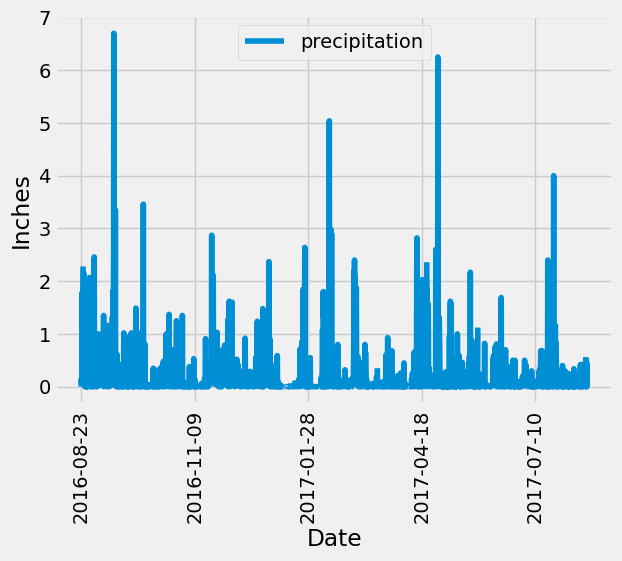

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year=dt.date(2017,8,23)-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
last_year=dt.date(one_year.year,one_year.month, one_year.day)

# Perform a query to retrieve the data and precipitation scores
total=session.query(measurement.date,measurement.prcp).\
        filter(measurement.date >= last_year).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data=pd.DataFrame(total,columns=['date','precipitation'])

# Sort the dataframe by date
data.set_index(data['date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
data.plot('date','precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
#USC00519281 has the most active stations with 2772

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
        filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

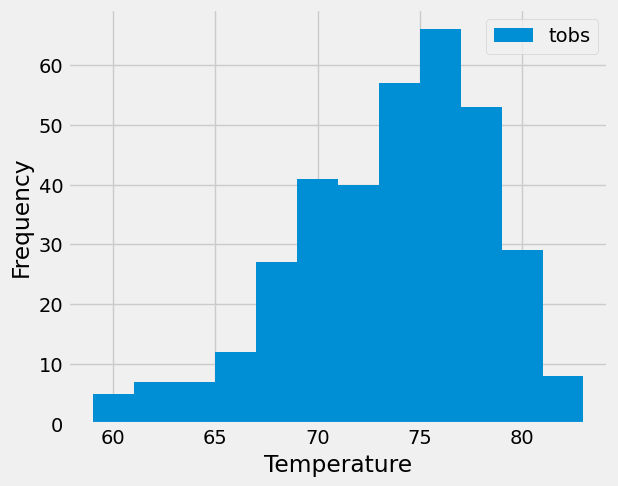

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results=session.query(measurement.tobs).filter(measurement.station=='USC00519281').\
    filter(measurement.date>='2016-08-23').all()

#Plot
highest_station_temp=pd.DataFrame(results,columns=['tobs'])
highest_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()